# 兰州天气数据分析（2019年至今）

本notebook对兰州天气数据进行全面分析，包括：
1. 数据预处理
2. 温度分析
3. 天气状况分析
4. 风力分析
5. 综合分析
6. 预测分析

In [5]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from scipy import stats

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置seaborn样式
sns.set_style('whitegrid')
sns.set_context('notebook')

## 1. 数据预处理

In [12]:
# 读取数据
df = pd.read_excel('../数据集/lanzhou_weather_data.xlsx')

# 数据预处理函数
def extract_temperature(temp_str):
    """提取温度数值"""
    return int(temp_str.replace('℃', ''))

def extract_wind_direction(wind_str):
    """提取风向"""
    if '无持续风向' in wind_str:
        return '无持续风向'
    return wind_str.split()[0]

def extract_wind_force(wind_str):
    """提取风力等级"""
    match = re.search(r'(\d+)-(\d+)级', wind_str)
    if match:
        return (int(match.group(1)) + int(match.group(2))) / 2
    return np.nan

# 处理日期
df['日期'] = pd.to_datetime(df['日期'], format='%Y年%m月%d日')

# 处理温度
df['最高气温_数值'] = df['最高气温'].apply(extract_temperature)
df['最低气温_数值'] = df['最低气温'].apply(extract_temperature)
df['日温差'] = df['最高气温_数值'] - df['最低气温_数值']

# 处理风向和风力
df['白天风向'] = df['白天风力'].apply(extract_wind_direction)
df['夜间风向'] = df['夜间风力'].apply(extract_wind_direction)
df['白天风力等级'] = df['白天风力'].apply(extract_wind_force)
df['夜间风力等级'] = df['夜间风力'].apply(extract_wind_force)

# 添加时间特征
df['年'] = df['日期'].dt.year
df['月'] = df['日期'].dt.month
df['季节'] = pd.cut(df['月'], 
                  bins=[0, 3, 6, 9, 12], 
                  labels=['春季', '夏季', '秋季', '冬季'])

print("数据预处理完成。处理后的数据示例：")
df.head()

数据预处理完成。处理后的数据示例：


,日期,白天天气,夜间天气,最高气温,最低气温,白天风力,夜间风力,最高气温_数值,最低气温_数值,日温差,白天风向,夜间风向,白天风力等级,夜间风力等级,年,月,季节
0,2019-01-01,晴,晴,0℃,-10℃,无持续风向 1-2级,无持续风向 1-2级,0,-10,10,无持续风向,无持续风向,1.5,1.5,2019,1,春季
1,2019-01-02,晴,晴,5℃,-9℃,无持续风向 1-2级,无持续风向 1-2级,5,-9,14,无持续风向,无持续风向,1.5,1.5,2019,1,春季
2,2019-01-03,多云,多云,0℃,-9℃,无持续风向 1-2级,无持续风向 1-2级,0,-9,9,无持续风向,无持续风向,1.5,1.5,2019,1,春季
3,2019-01-04,多云,多云,0℃,-8℃,无持续风向 1-2级,无持续风向 1-2级,0,-8,8,无持续风向,无持续风向,1.5,1.5,2019,1,春季
4,2019-01-05,晴,晴,7℃,-8℃,无持续风向 1-2级,无持续风向 1-2级,7,-8,15,无持续风向,无持续风向,1.5,1.5,2019,1,春季


## 2. 温度分析

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8451 (\N{DEGREE CELSIUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:

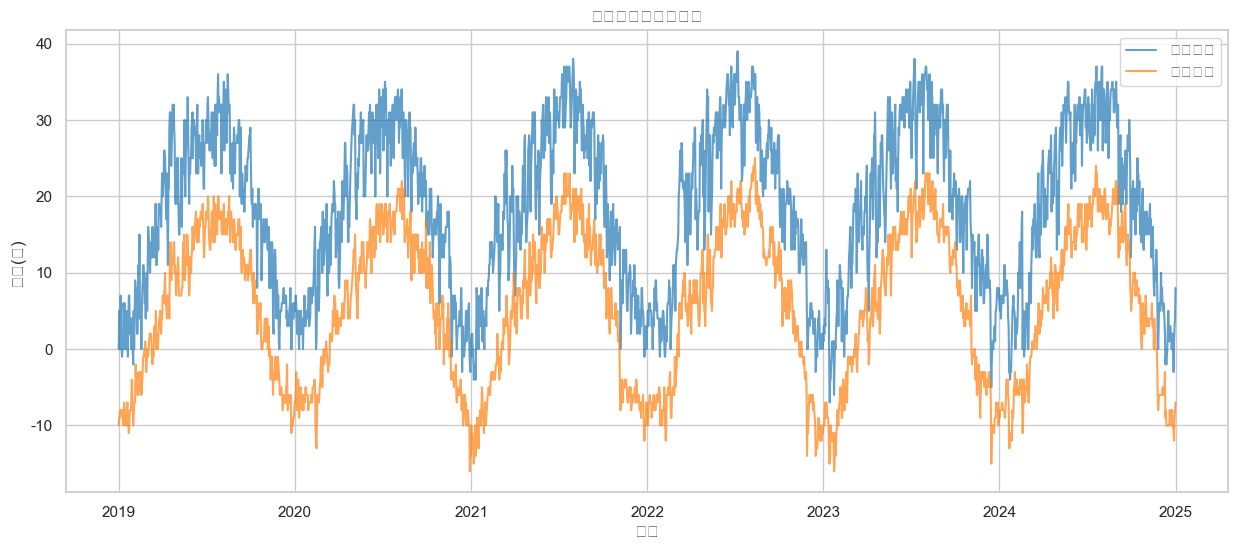

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8451 (\N{DEGREE CELSIUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:

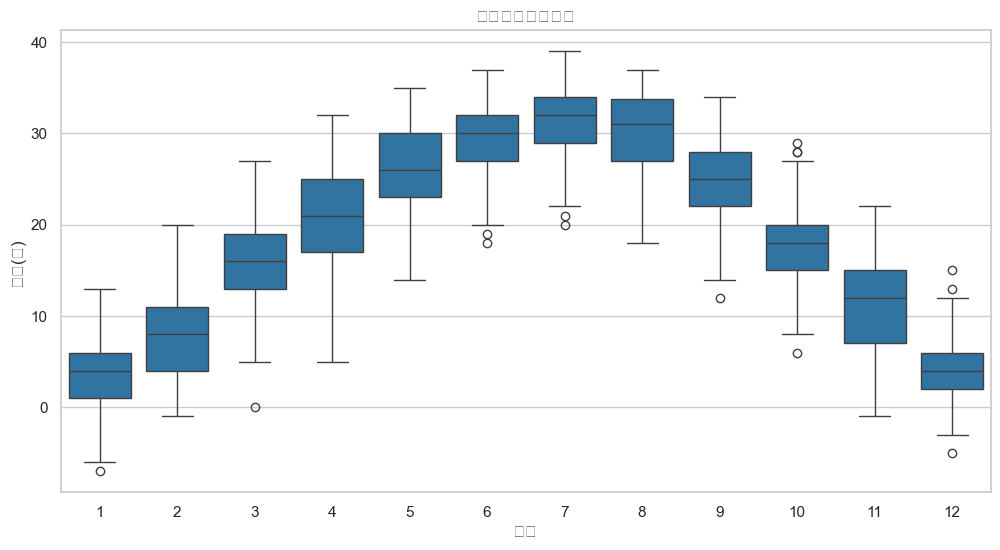

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8451 (\N{DEGREE CELSIUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:

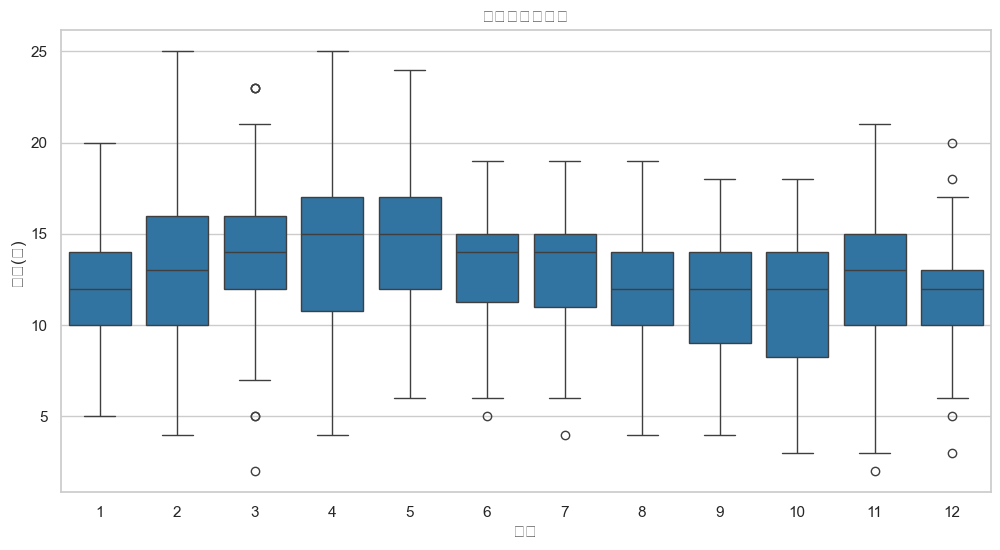


温度统计信息：
      最高气温_数值  最低气温_数值    日温差
mean    18.49     5.79  12.70
std     10.64     9.86   3.48
min     -7.00   -16.00   2.00
max     39.00    25.00  25.00


In [17]:
# 2.1 年度温度变化趋势
plt.figure(figsize=(15, 6))
plt.plot(df['日期'], df['最高气温_数值'], label='最高气温', alpha=0.7)
plt.plot(df['日期'], df['最低气温_数值'], label='最低气温', alpha=0.7)
plt.title('兰州市气温变化趋势')
plt.xlabel('日期')
plt.ylabel('温度(℃)')
plt.legend()
plt.show()

# 2.2 季节性温度分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='月', y='最高气温_数值', data=df)
plt.title('月度最高气温分布')
plt.xlabel('月份')
plt.ylabel('温度(℃)')
plt.show()

# 2.3 日温差分析
plt.figure(figsize=(12, 6))
sns.boxplot(x='月', y='日温差', data=df)
plt.title('月度日温差分布')
plt.xlabel('月份')
plt.ylabel('温差(℃)')
plt.show()

# 2.4 温度统计信息
temp_stats = df.agg({
    '最高气温_数值': ['mean', 'std', 'min', 'max'],
    '最低气温_数值': ['mean', 'std', 'min', 'max'],
    '日温差': ['mean', 'std', 'min', 'max']
}).round(2)

print("\n温度统计信息：")
print(temp_stats)

## 3. 天气状况分析

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26228 (\N{CJK UNIFIED IDEOGRAPH-6674}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38452 (\N{CJK UNIFIED IDEOGRAPH-9634}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\p

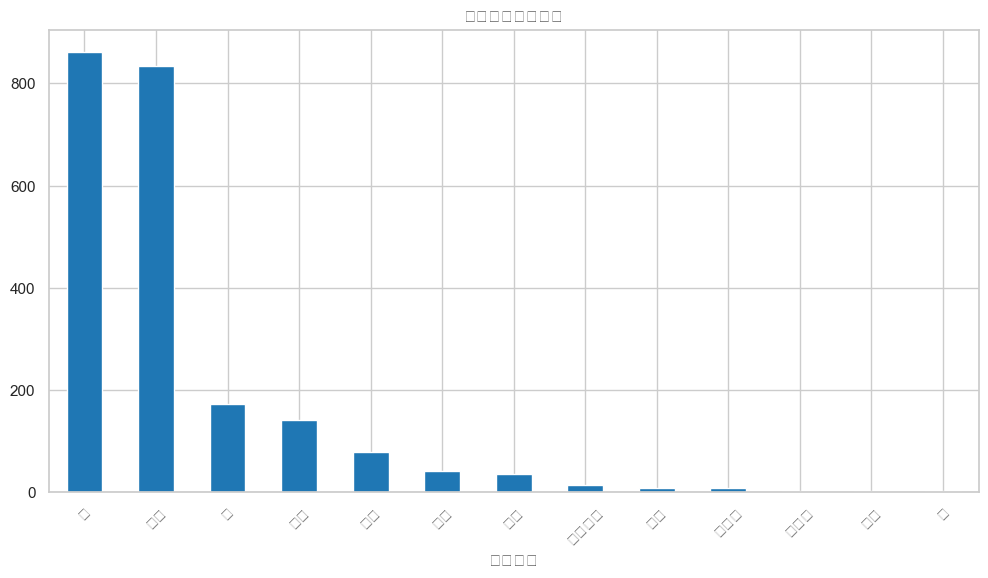

D:\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) Arial.
  fig.canvas.draw()
D:\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from font(s) Arial.
  fig.canvas.draw()
D:\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) Arial.
  fig.canvas.draw()
D:\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 38632 (\N{CJK UNIFIED IDEOGRAPH-96E8}) missing from font(s) Arial.
  fig.canvas.draw()
D:\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 38634 (\N{CJK UNIFIED IDEOGRAPH-96EA}) missing from font(s) Arial.
  fig.canvas.draw()
D:\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from font(s) Arial.
  fig.canvas.draw()
D:\anaconda3\Lib\site-packages\seaborn\utils.py:61: 

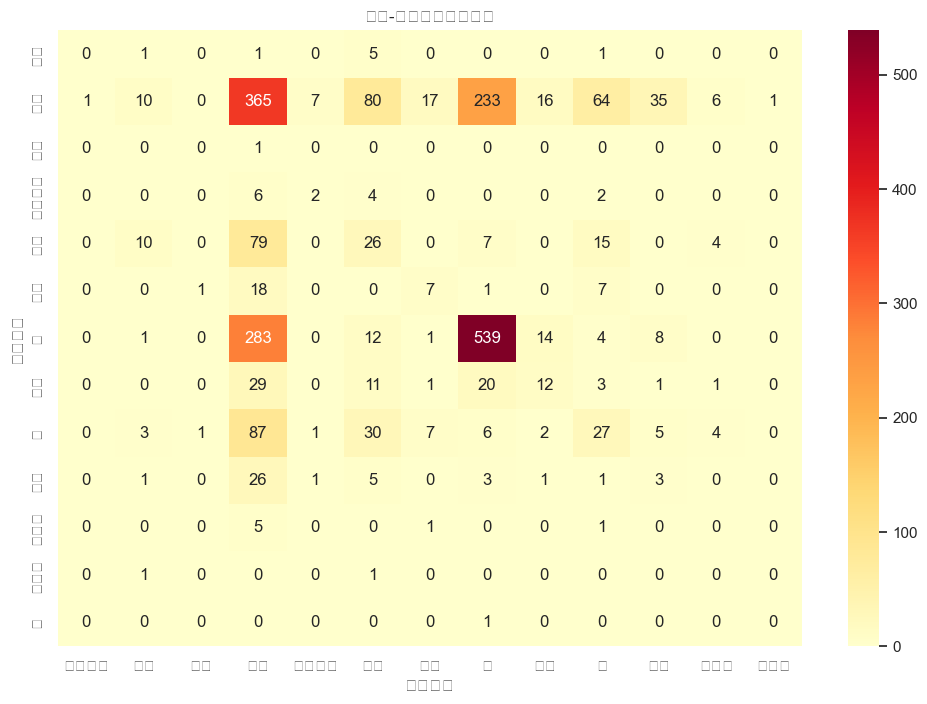

C:\Users\BACK\AppData\Local\Temp\ipykernel_23000\309734782.py:25: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\BACK\AppData\Local\Temp\ipykernel_23000\309734782.py:25: UserWarning: Glyph 23395 (\N{CJK UNIFIED IDEOGRAPH-5B63}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\BACK\AppData\Local\Temp\ipykernel_23000\309734782.py:25: UserWarning: Glyph 22799 (\N{CJK UNIFIED IDEOGRAPH-590F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\BACK\AppData\Local\Temp\ipykernel_23000\309734782.py:25: UserWarning: Glyph 31179 (\N{CJK UNIFIED IDEOGRAPH-79CB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\BACK\AppData\Local\Temp\ipykernel_23000\309734782.py:25: UserWarning: Glyph 20908 (\N{CJK UNIFIED IDEOGRAPH-51AC}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\BACK\AppData\Local\Temp\ipykernel_23000\309734782.py:25: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing fro

<Figure size 1200x600 with 0 Axes>

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23395 (\N{CJK UNIFIED IDEOGRAPH-5B63}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22799 (\N{CJK UNIFIED IDEOGRAPH-590F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31179 (\N{CJK UNIFIED IDEOGRAPH-79CB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20908 (\N{CJK UNIFIED IDEOGRAPH-51AC}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\p

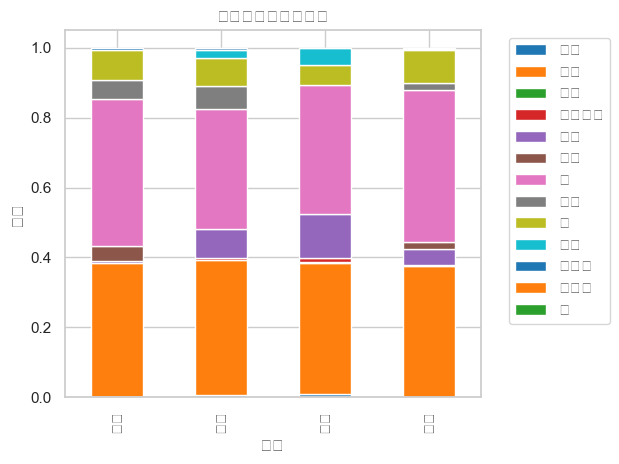

In [22]:
# 3.1 天气类型统计
plt.figure(figsize=(12, 6))
df['白天天气'].value_counts().plot(kind='bar')
plt.title('白天天气类型分布')
plt.xticks(rotation=45)
plt.show()

# 3.2 白天/夜间天气对比
weather_compare = pd.crosstab(df['白天天气'], df['夜间天气'])
plt.figure(figsize=(12, 8))
sns.heatmap(weather_compare, annot=True, fmt='d', cmap='YlOrRd')
plt.title('白天-夜间天气转换频次')
plt.show()

# 3.3 季节性天气分布
seasonal_weather = pd.crosstab(df['季节'], df['白天天气'])
seasonal_weather_pct = seasonal_weather.div(seasonal_weather.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
seasonal_weather_pct.plot(kind='bar', stacked=True)
plt.title('各季节天气类型分布')
plt.xlabel('季节')
plt.ylabel('比例')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 4. 风力分析

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25345 (\N{CJK UNIFIED IDEOGRAPH-6301}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\p

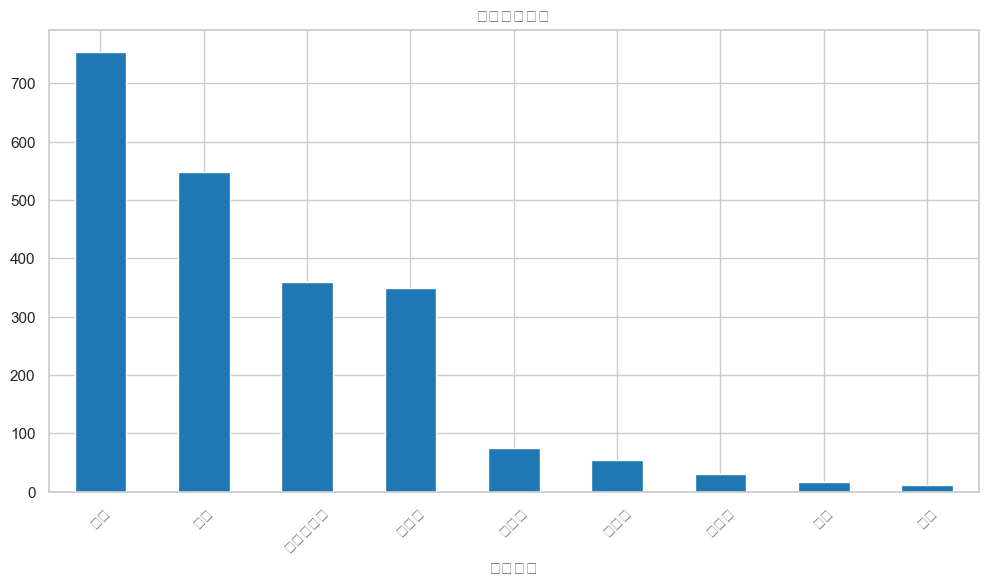

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31561 (\N{CJK UNIFIED IDEOGRAPH-7B49}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\p

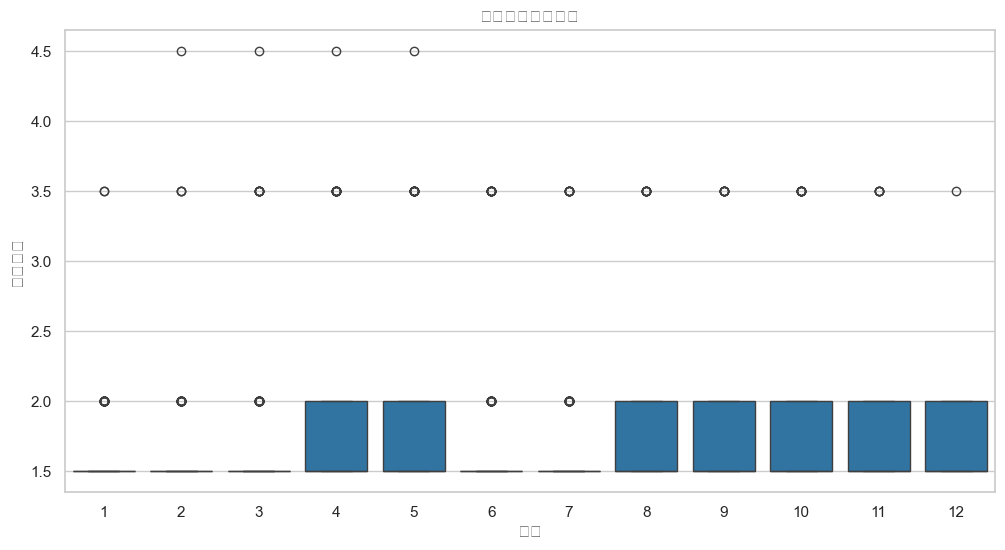

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27668 (\N{CJK UNIFIED IDEOGRAPH-6C14}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8451 (\N{DEGREE CELSIUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:

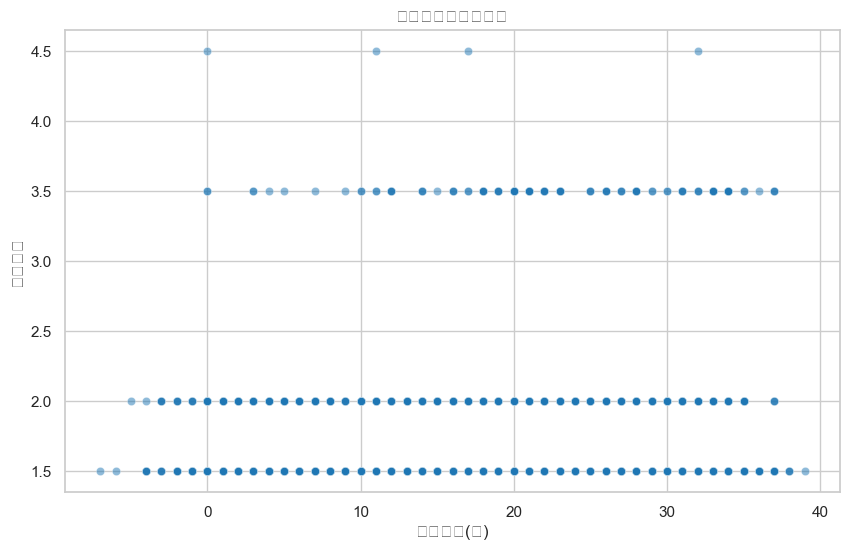

In [25]:
# 4.1 风向分布
plt.figure(figsize=(12, 6))
df['白天风向'].value_counts().plot(kind='bar')
plt.title('白天风向分布')
plt.xticks(rotation=45)
plt.show()

# 4.2 风力等级分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='月', y='白天风力等级', data=df)
plt.title('月度风力等级分布')
plt.xlabel('月份')
plt.ylabel('风力等级')
plt.show()

# 4.3 风力与温度的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='最高气温_数值', y='白天风力等级', alpha=0.5)
plt.title('气温与风力等级关系')
plt.xlabel('最高气温(℃)')
plt.ylabel('风力等级')
plt.show()

## 5. 综合分析

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26228 (\N{CJK UNIFIED IDEOGRAPH-6674}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38452 (\N{CJK UNIFIED IDEOGRAPH-9634}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\p

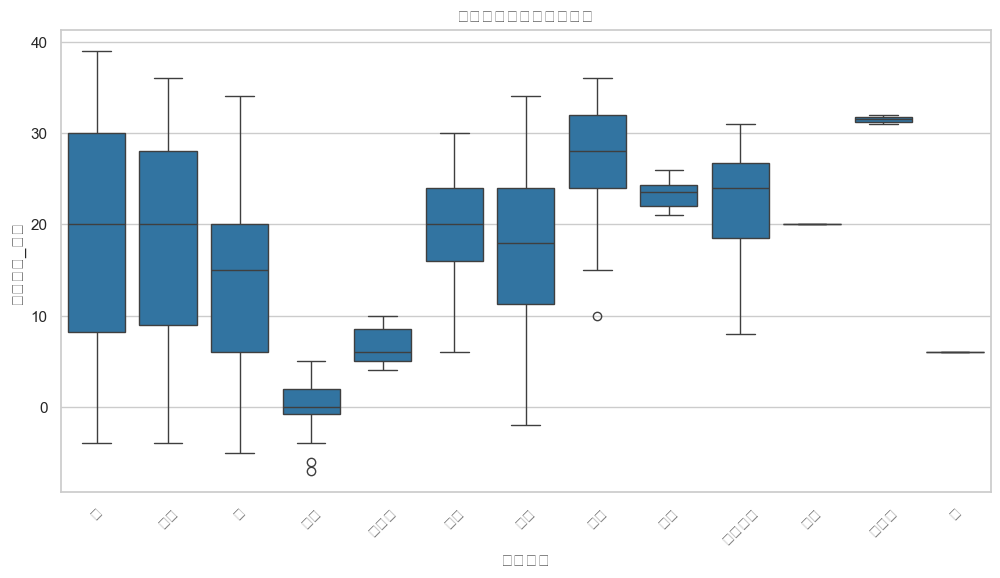


年度天气统计：
      最高气温_数值  最低气温_数值    日温差  白天风力等级
年                                    
2019    17.79     5.56  12.23    1.65
2020    17.78     5.56  12.22    1.57
2021    18.60     5.53  13.07    1.61
2022    19.16     6.11  13.05    1.70
2023    18.85     5.72  13.13    1.74
2024    18.78     6.26  12.52    2.00

极端温度记录：
             日期 最高气温  最低气温 白天天气
731  2020-12-29  -2℃  -16℃    晴
733  2020-12-31   0℃  -14℃   多云
739  2021-01-06  -4℃  -15℃    晴
740  2021-01-07  -4℃  -14℃    晴
741  2021-01-08  -3℃  -14℃    晴
743  2021-01-10  -4℃  -14℃   小雪
929  2021-07-13  37℃   23℃    晴
934  2021-07-18  37℃   20℃    晴
939  2021-07-23  37℃   22℃    晴
947  2021-07-31  38℃   19℃    晴
948  2021-08-01  37℃   21℃    晴
1275 2022-06-24  37℃   22℃    晴
1287 2022-07-06  38℃   20℃    晴
1288 2022-07-07  39℃   21℃    晴
1289 2022-07-08  37℃   21℃    晴
1318 2022-08-06  37℃   23℃    晴
1319 2022-08-07  37℃   22℃    晴
1320 2022-08-08  37℃   23℃    晴
1432 2022-11-28   3℃  -14℃   浮尘
1450 2022-12-16  -3℃  -14℃    阴
1478 2

In [28]:
# 5.1 天气-温度关系
plt.figure(figsize=(12, 6))
sns.boxplot(x='白天天气', y='最高气温_数值', data=df)
plt.title('不同天气类型的温度分布')
plt.xticks(rotation=45)
plt.show()

# 5.2 年度统计
yearly_stats = df.groupby('年').agg({
    '最高气温_数值': 'mean',
    '最低气温_数值': 'mean',
    '日温差': 'mean',
    '白天风力等级': 'mean'
}).round(2)

print("\n年度天气统计：")
print(yearly_stats)

# 5.3 极端天气分析
extreme_temp = df[df['最高气温_数值'].isin(df['最高气温_数值'].nlargest(10)) |
                 df['最低气温_数值'].isin(df['最低气温_数值'].nsmallest(10))]

print("\n极端温度记录：")
print(extreme_temp[['日期', '最高气温', '最低气温', '白天天气']].to_string())

## 6. 预测分析

In [33]:
# 6.1 温度趋势分析
monthly_temp = df.groupby(['年', '月'])['最高气温_数值'].mean().reset_index()
monthly_temp['日期'] = pd.to_datetime(monthly_temp[['年', '月']].assign(DAY=1))

plt.figure(figsize=(15, 6))
sns.regplot(data=monthly_temp, x=np.arange(len(monthly_temp)), y='最高气温_数值',
           scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('月平均气温趋势')
plt.xlabel('时间')
plt.ylabel('平均气温(℃)')
plt.show()

# 6.2 天气模式分析
weather_patterns = df.groupby(['月', '白天天气']).size().unstack(fill_value=0)
weather_patterns_pct = weather_patterns.div(weather_patterns.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(weather_patterns_pct, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('月度天气模式分布')
plt.show()

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month,year] is missing

## 7. 结论和发现

根据以上分析，我们可以总结以下几点发现：

1. 温度特征：
   - 年平均最高/最低温度
   - 温度变化趋势
   - 日温差特征

2. 天气特征：
   - 主要天气类型及其分布
   - 季节性天气特征
   - 天气转换规律

3. 风力特征：
   - 主要风向分布
   - 风力等级特征
   - 风力与温度的关系

4. 特殊发现：
   - 极端天气事件
   - 异常天气模式
   - 长期变化趋势

建议：
1. [根据分析结果填写具体建议]
2. [填写建议2]
3. [填写建议3]